<a href="https://colab.research.google.com/github/MKhromina/test_task/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_2_%D0%9C%D0%9E%D0%92_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Предстоит решить задачу классификации изображений – отделить изображения котов (или кошек) от изображений собак, используя классификацию с мягким зазором и параметром C.  В качестве исходных данных выступает набор данных Dogs vs. Cats.

In [ ]:
!pip install --upgrade pip
!pip install imutils
!pip install opencv-python

     |████████████████████████████████| 1.5MB 8.3MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [ ]:
# подключение библиотек
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from IPython.display import Image
from imutils import paths
import numpy as np
import cv2
import os

В предложенном архиве находится выборка, включающая в себя изображения кошек и собак (по 500 изображений). Имя каждого изображения, для удобства, имеет следующий формат:  cat/dog.номер_изображения.jpg  в зависимости от того, какое животное присутствует на изображении. Данная выборка используется для обучения классификатора и оценки классификатора.


Следующая выборка предназначена для классификации новых объектов после построения классификатора.

In [ ]:
data=files.upload()

Saving test_task_2pr.zip to test_task_2pr.zip
Saving train_task_2pr.zip to train_task_2pr.zip


In [ ]:
!unzip test_task_2pr.zip
!unzip train_task_2pr.zip

Archive:  test_task_2pr.zip
   creating: test/
  inflating: test/.DS_Store          
   creating: test/.ipynb_checkpoints/
  inflating: test/cat.1000.jpg       
  inflating: test/cat.1001.jpg       
  inflating: test/cat.1002.jpg       
  inflating: test/cat.1003.jpg       
  inflating: test/cat.1004.jpg       
  inflating: test/cat.1005.jpg       
  inflating: test/cat.1006.jpg       
  inflating: test/cat.1007.jpg       
  inflating: test/cat.1008.jpg       
  inflating: test/cat.1009.jpg       
  inflating: test/cat.1010.jpg       
  inflating: test/cat.1011.jpg       
  inflating: test/cat.1012.jpg       
  inflating: test/cat.1013.jpg       
  inflating: test/cat.1014.jpg       
  inflating: test/cat.1015.jpg       
  inflating: test/cat.1016.jpg       
  inflating: test/cat.1017.jpg       
  inflating: test/cat.1018.jpg       
  inflating: test/cat.1019.jpg       
  inflating: test/cat.1020.jpg       
  inflating: test/cat.1021.jpg       
  inflating: test/cat.1022.jpg       
  i

Для работы с изображениями, найдем их гистограммы — характеристики распределения интенсивности изображения. Для этого можно воспользоваться следующим методом.

In [ ]:
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

Считаем изображения из корневой папки train и вычислим гистограмму каждого изображения. Кроме того, отделим метку каждого изображения. Обработка большого числа изображений в облачных сервисах занимает длительное время (1-5 минут).

In [ ]:
imagePaths = sorted(list(paths.list_images('train')))
data = []
labels = []

for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath, 1)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
    hist = extract_histogram(image)
    data.append(hist)
    labels.append(label)

Преобразуем метки в удобный формат 0 и 1 и посмотрим, какой код и какая метка соответствует самой первой попавшейся нам картинке

0


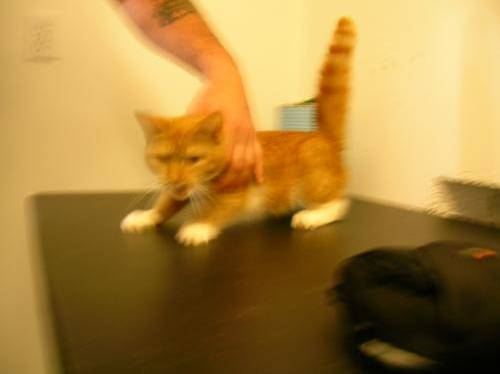

In [ ]:
le = LabelEncoder()
labels = le.fit_transform(labels)
print(labels[0])
Image(filename=imagePaths[0])

Видно, что классом ноль у нас занумерованы коты (кошки). Разделим выборку на тренировочную и тестовую в отношении 75/25 с параметром random_state = 7.

In [ ]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(data), labels, test_size=0.25, random_state=7)

Теперь обучим модель почти-разделяющий гиперплосоксти на наших данных, а также оценим ее на тестовых. Параметр C = 0.58.

In [ ]:
model = LinearSVC(random_state = 5, C = 0.58)
model.fit(trainData, trainLabels)

LinearSVC(C=0.58, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=5, tol=0.0001,
          verbose=0)

In [ ]:
predictions = model.predict(testData)

**Составм матрицу ошибок для каждого класса,
рассчитаемточность (precision) и полноту (recall). 
Затем вычислите значение метрики F1 для каждого класса:**

*F1=2 * ((precision * recall/(precision + recall))*


In [ ]:
print(classification_report(testLabels, predictions, target_names=le.classes_))

              precision    recall  f1-score   support

         cat       0.56      0.71      0.63       119
         dog       0.65      0.50      0.57       131

    accuracy                           0.60       250
   macro avg       0.61      0.60      0.60       250
weighted avg       0.61      0.60      0.60       250



In [ ]:
from sklearn.metrics import f1_score
predictions = model.predict(testData)
f1_score(testLabels, predictions, average='macro')

0.5979155944415853

**Выведем коэффициенты  θ308, θ13, θ414  построенной гиперплоскости:**

In [ ]:
model.coef_[0][308]

0.09393466544919912

In [ ]:
model.coef_[0][13]

-0.1175201004819182

In [ ]:
model.coef_[0][414]

-0.005316268069928712

**Вычислим предсказания для объекта из папки test**

In [ ]:
singleImage = cv2.imread('test/cat.1037.jpg')
histt = extract_histogram(singleImage)
histt2 = histt.reshape(1, -1)
prediction = model.predict(histt2)

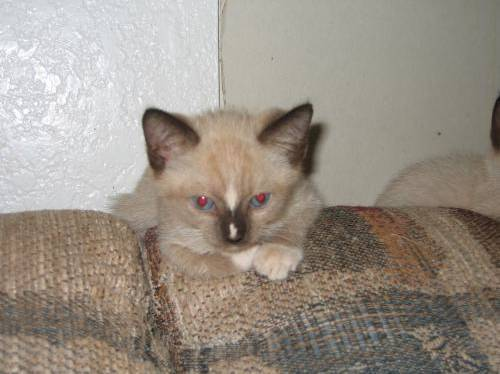

In [ ]:
Image(filename='test/cat.1037.jpg')

In [ ]:
prediction

array([0])